# mnist dataset practice 

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Creating the model


In [4]:
model = Sequential()
model.add((Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,1))))
model.add((MaxPooling2D(3,3)))
model.add(Flatten())
model.add((Dense(10, activation = 'softmax')))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
    loss = 'sparse_categorical_crossentropy',
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy(), tf.keras.metrics.MeanAbsoluteError()]
)

# Fitting the model

In [11]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist

In [12]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [13]:
train_images.shape

(60000, 28, 28)

In [16]:
labels = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle_boot'
    
]

print(train_labels[0])

9


In [17]:
# rescaling the images to be in 0 and 1
train_images = train_images / 255.
test_images = test_images / 255.

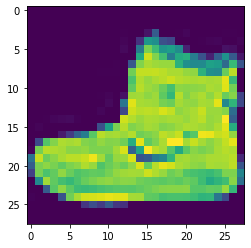

label: Ankle_boot


In [22]:
# display the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

In [26]:
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size = 256, verbose = 2)

Train on 60000 samples
Epoch 1/8
60000/60000 - 1s - loss: 0.3175 - sparse_categorical_accuracy: 0.8882 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 - 1s - loss: 0.3043 - sparse_categorical_accuracy: 0.8934 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 - 1s - loss: 0.2987 - sparse_categorical_accuracy: 0.8932 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 - 1s - loss: 0.2914 - sparse_categorical_accuracy: 0.8956 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 - 1s - loss: 0.2840 - sparse_categorical_accuracy: 0.8992 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 - 1s - loss: 0.2764 - sparse_categorical_accuracy: 0.9004 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 - 1s - loss: 0.2710 - sparse_categorical_accuracy: 0.9036 - mean_absolute_error: 4.4200
Epoch 8/8
60000/60000 - 1s - loss: 0.2665 - sparse_categorical_accuracy: 0.9043 - mean_absolute_error: 4.4200


In [27]:
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.317529,0.888183,4.420000
1,0.304323,0.893367,4.420000
2,0.298699,0.893200,4.420001
3,0.291371,0.895567,4.420000
4,0.283984,0.899183,4.420001


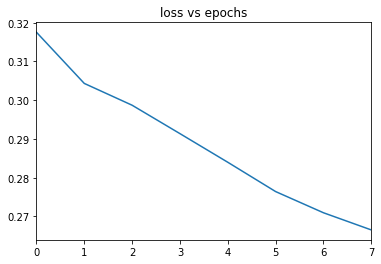

In [28]:
loss_plot = df.plot(y = 'loss', title = 'loss vs epochs', legend = False)

#  Predicting and evaluating the model

In [30]:
test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3179 - sparse_categorical_accuracy: 0.8833 - mean_absolute_error: 4.4200


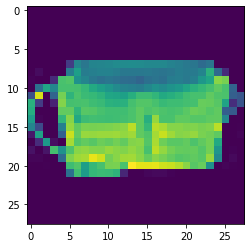

label: Bag


In [52]:
# choosing a random test image
idx = np.random.choice(test_images.shape[0])
test_image = test_images[idx]
plt.imshow(test_image)
plt.show()
print(f"label: {labels[test_labels[idx]]}")

In [33]:
model.predict(test_image[np.newaxis,...,np.newaxis])

array([[9.5549315e-01, 8.4494907e-08, 3.0315174e-05, 1.0638673e-05,
        1.6016123e-04, 5.0938888e-14, 4.3986462e-02, 3.7369351e-13,
        3.1898890e-04, 5.3769207e-12]], dtype=float32)